In [1]:
from tensorflow import keras

In [2]:
x,y = keras.datasets.cifar10.load_data()

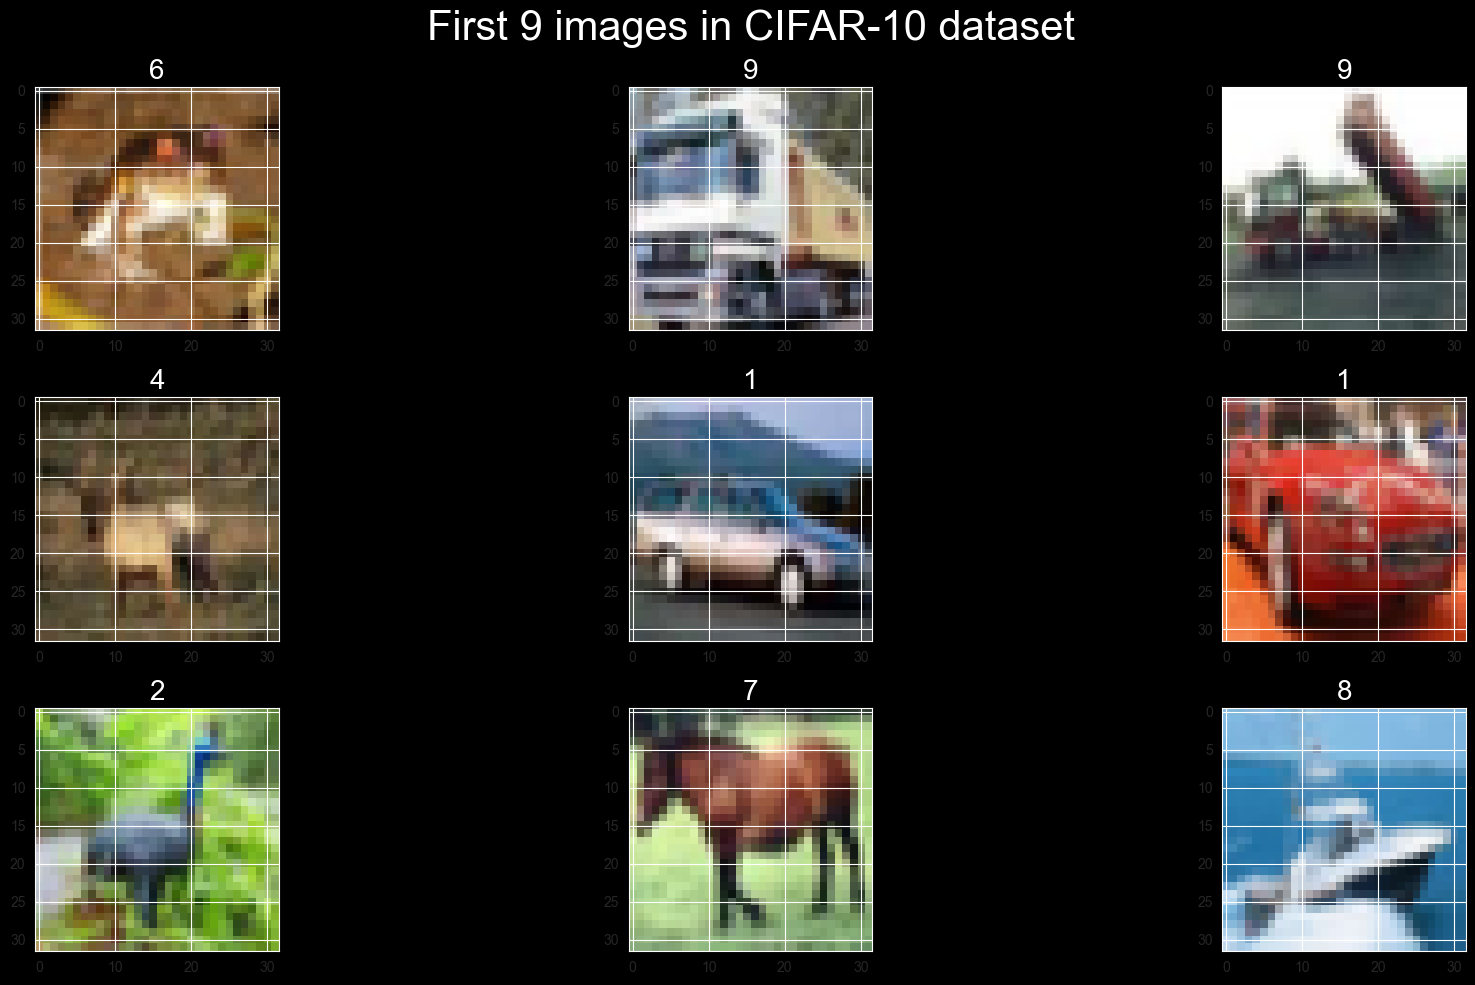

In [3]:
x_train, y_train = x

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.figure(figsize=(20, 10),facecolor='black',edgecolor='red')
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i][0],color='white',size=20)
    
plt.suptitle('First 9 images in CIFAR-10 dataset',color='white',size=30)
plt.tight_layout()
plt.show()

In [ ]:
x_trains = x_train.reshape(50000, 32*32*3) / 255.0
y_trains = y_train.reshape(50000)

In [8]:
nn = keras.models.Sequential()
nn.add(keras.layers.Dense(512, activation='relu', input_shape=(32*32*3,)))
nn.add(keras.layers.Dense(10, activation='softmax'))
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn.fit(x_trains, y_trains, epochs=1)

c:\Users\Slmss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.2955 - loss: 2.0427


In [13]:
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(keras.layers.MaxPooling2D((2, 2)))
# cnn.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
# cnn.add(keras.layers.MaxPooling2D((2, 2)))
# cnn.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(512, activation='relu'))
cnn.add(keras.layers.Dense(10, activation='softmax'))
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(x_train, y_train, epochs=1)

c:\Users\Slmss\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 59ms/step - accuracy: 0.3118 - loss: 22.0663


In [19]:
x,y = keras.datasets.boston_housing.load_data()

In [22]:
x_train, y_train = x
x_train.shape,y_train.shape

((404, 13), (404,))

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
nn = keras.models.Sequential()
nn.add(keras.layers.Dense(128, activation='relu', input_shape=(13,)))
nn.add(keras.layers.Dense(128, activation='relu'))
nn.add(keras.layers.Reshape((1, 128)))  # Reshape the input to 3D
nn.add(keras.layers.GRU(128, activation='relu'))
nn.add(keras.layers.Dense(128, activation='relu'))
nn.add(keras.layers.Dense(1))

# Compile the model with a smaller learning rate
nn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with more epochs and early stopping
hist = nn.fit(x_train, y_train, batch_size=32, epochs=200, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - loss: 408.3972 - mae: 15.5114 - val_loss: 72.5880 - val_mae: 6.4203
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.8786 - mae: 6.5634 - val_loss: 69.7987 - val_mae: 5.9508
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 62.4954 - mae: 5.6725 - val_loss: 70.3317 - val_mae: 6.1876
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 59.9731 - mae: 5.7556 - val_loss: 73.6881 - val_mae: 6.6673
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 66.9544 - mae: 6.0264 - val_loss: 69.0437 - val_mae: 6.1783
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 60.3034 - mae: 5.5546 - val_loss: 68.0757 - val_mae: 6.0543
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 65.3417 - mae: 5.6276 - val_loss: 69.0384 - val_mae: 6.1356
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 51.1719 - mae: 5.2702 - val_loss: 67.6490 - val_mae: 5.6875
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━

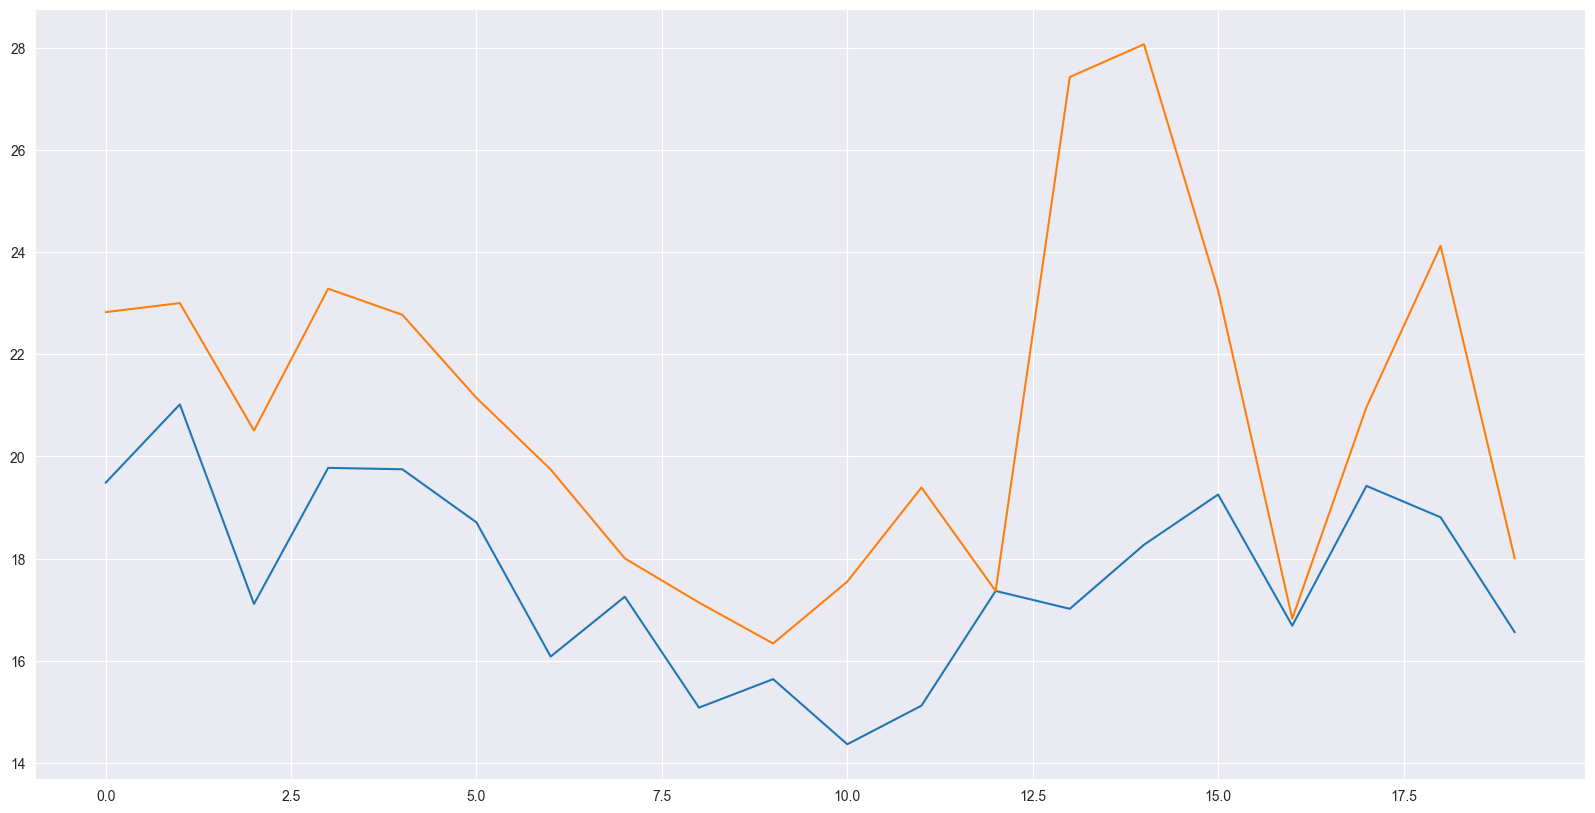

In [54]:
plt.figure(figsize=(20, 10))
plt.plot(hist.history['loss'][-20:], label='loss')
plt.plot(hist.history['val_loss'][-20:], label='val_loss')